# IMPORTS

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk

In [3]:
import numpy as np

# Exercise 1

Create a variable phrase containing a list of words. Experiment with the operations
described in this chapter, including addition, multiplication, indexing, slicing,
and sorting.

In [4]:
phrase = ['Minsk', 'is', 'the', 'capital', 'of', 'Belarus']

In [5]:
phrase + phrase

['Minsk',
 'is',
 'the',
 'capital',
 'of',
 'Belarus',
 'Minsk',
 'is',
 'the',
 'capital',
 'of',
 'Belarus']

In [6]:
phrase * 3

['Minsk',
 'is',
 'the',
 'capital',
 'of',
 'Belarus',
 'Minsk',
 'is',
 'the',
 'capital',
 'of',
 'Belarus',
 'Minsk',
 'is',
 'the',
 'capital',
 'of',
 'Belarus']

In [7]:
phrase[0], phrase[1], phrase[-1]

('Minsk', 'is', 'Belarus')

In [8]:
phrase[1:4], phrase[-3:], phrase[2:-2]

(['is', 'the', 'capital'], ['capital', 'of', 'Belarus'], ['the', 'capital'])

In [9]:
sorted(phrase)

['Belarus', 'Minsk', 'capital', 'is', 'of', 'the']

# Exercise 2

Use the corpus module to explore austen-persuasion.txt. How many **word
tokens** does this book have? How many **word types**?

In [10]:
from nltk.corpus import gutenberg

In [11]:
def tokens_count(tokens):
    return len(tokens)

In [12]:
def types_count(tokens):
    return len(set(tokens))

In [13]:
def get_word_tokens(tokens):
    return [w.lower() for w in tokens if w.isalpha()]

In [14]:
word_tokens = get_word_tokens(gutenberg.words('austen-persuasion.txt'))

In [15]:
word_tokens_count = tokens_count(word_tokens)
word_types_count = types_count(word_tokens)
word_tokens_count, word_types_count

(84121, 5739)

# Exercise 3

Use the Brown Corpus reader nltk.corpus.brown.words() or the Web Text Corpus
reader nltk.corpus.webtext.words() to access some sample text in two different
genres.

In [16]:
from nltk.corpus import brown, webtext

In [17]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [18]:
brown.words(categories='adventure')

['Dan', 'Morgan', 'told', 'himself', 'he', 'would', ...]

In [19]:
brown.words(categories='government')

['The', 'Office', 'of', 'Business', 'Economics', '(', ...]

In [20]:
webtext.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']

In [21]:
webtext.words('grail.txt')

['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', ...]

In [22]:
webtext.words('firefox.txt')

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]

# Exercise 4

Read in the texts of the State of the Union addresses, using the state_union corpus
reader. Count occurrences of men, women, and people in each document. What has
happened to the usage of these words over time?

In [23]:
from nltk.corpus import state_union
from nltk.probability import ConditionalFreqDist

In [24]:
cfd_file = ConditionalFreqDist(
    (w.lower(), file)
    for file in state_union.fileids()
    for w in state_union.words(file)
    if w.lower() in ['men', 'women', 'people']
)

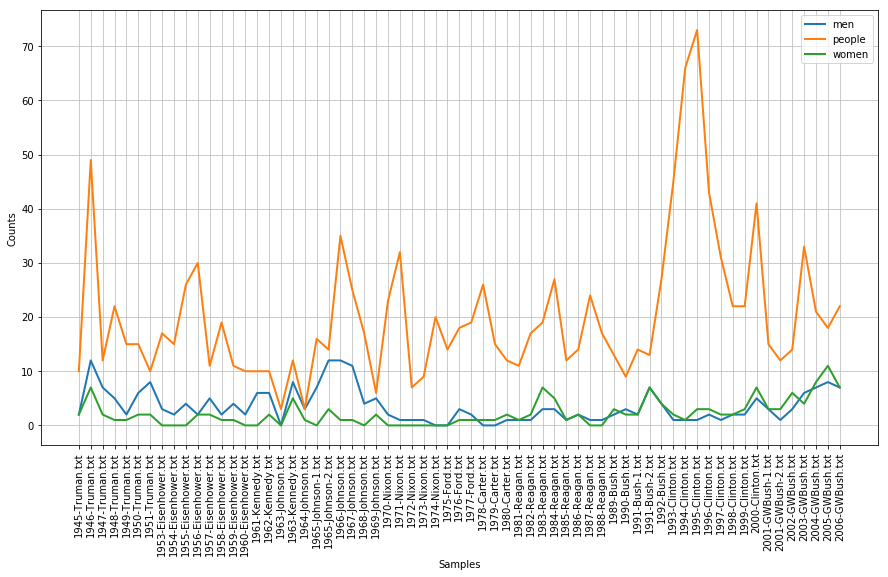

In [25]:
plt.figure(figsize=(15, 8))
cfd_file.plot()

In [26]:
cfd_time = ConditionalFreqDist(
    (w.lower(), file[:4])
    for file in state_union.fileids()
    for w in state_union.words(file)
    if w.lower() in ['men', 'women', 'people']
)

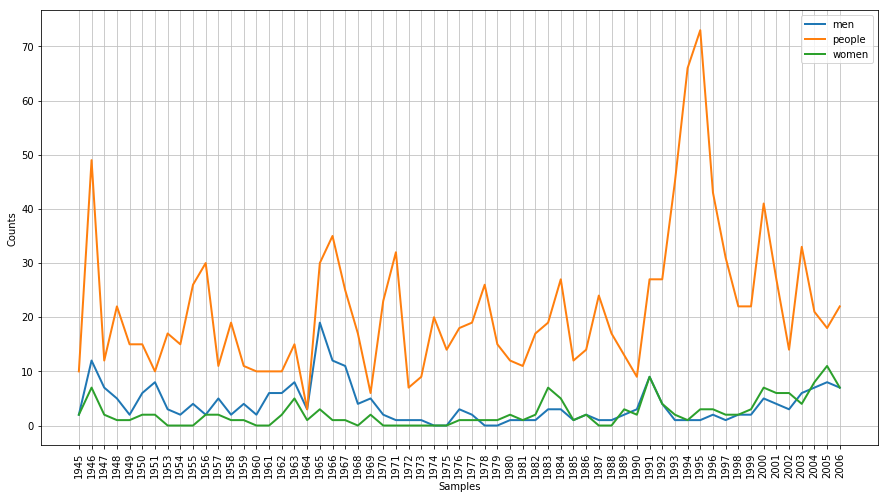

In [27]:
plt.figure(figsize=(15, 8))
cfd_time.plot()

# Exercise 5

Investigate the holonym-meronym relations for some nouns. Remember that
there are three kinds of holonym-meronym relation, so you need to use member_meronyms(), part_meronyms(), substance_meronyms(), member_holonyms(),
part_holonyms(), and substance_holonyms().

In [28]:
from nltk.corpus import wordnet as wn

In [29]:
for synset in wn.synsets('computer', 'n'):
    print(synset.name() + ':', synset.definition())

computer.n.01: a machine for performing calculations automatically
calculator.n.01: an expert at calculation (or at operating calculating machines)


In [30]:
computer = wn.synset('computer.n.01')

In [31]:
computer.part_meronyms()  # 'computer' contains the following parts

[Synset('busbar.n.01'),
 Synset('cathode-ray_tube.n.01'),
 Synset('central_processing_unit.n.01'),
 Synset('chip.n.07'),
 Synset('computer_accessory.n.01'),
 Synset('computer_circuit.n.01'),
 Synset('data_converter.n.01'),
 Synset('disk_cache.n.01'),
 Synset('diskette.n.01'),
 Synset('hardware.n.03'),
 Synset('keyboard.n.01'),
 Synset('memory.n.04'),
 Synset('monitor.n.04'),
 Synset('peripheral.n.01')]

In [32]:
computer.part_holonyms()  # 'computer' is contained in as a part

[Synset('platform.n.03')]

In [33]:
for synset in wn.synsets('paper', 'n'):
    print(synset.name() + ':', synset.definition())

paper.n.01: a material made of cellulose pulp derived mainly from wood or rags or certain grasses
composition.n.08: an essay (especially one written as an assignment)
newspaper.n.01: a daily or weekly publication on folded sheets; contains news and articles and advertisements
paper.n.04: a medium for written communication
paper.n.05: a scholarly article describing the results of observations or stating hypotheses
newspaper.n.02: a business firm that publishes newspapers
newspaper.n.03: the physical object that is the product of a newspaper publisher


In [34]:
paper = wn.synset('paper.n.01')

In [35]:
paper.substance_meronyms()  # paper is made from cellulose

[Synset('cellulose.n.01')]

In [36]:
for synset in wn.synsets('wood', 'n'):
    print(synset.name() + ':', synset.definition())

wood.n.01: the hard fibrous lignified substance under the bark of trees
forest.n.01: the trees and other plants in a large densely wooded area
wood.n.03: United States film actress (1938-1981)
wood.n.04: English conductor (1869-1944)
wood.n.05: English writer of novels about murders and thefts and forgeries (1814-1887)
wood.n.06: United States painter noted for works based on life in the Midwest (1892-1942)
woodwind.n.01: any wind instrument other than the brass instruments
wood.n.08: a golf club with a long shaft used to hit long shots; originally made with a wooden head


In [37]:
wood = wn.synset('wood.n.01')

In [38]:
wood.substance_holonyms()  # wood is a substance of beam, chopping_block, lumber, spindle

[Synset('beam.n.02'),
 Synset('chopping_block.n.01'),
 Synset('lumber.n.01'),
 Synset('spindle.n.02')]

In [39]:
for synset in wn.synsets('parent', 'n'):
    print(synset.name() + ':', synset.definition())

parent.n.01: a father or mother; one who begets or one who gives birth to or nurtures and raises a child; a relative who plays the role of guardian
parent.n.02: an organism (plant or animal) from which younger ones are obtained


In [40]:
parent = wn.synset('parent.n.01')

In [41]:
parent.member_holonyms()  # parent is a member of a family

[Synset('family.n.02')]

In [42]:
family = parent.member_holonyms()[0]

In [43]:
family.member_meronyms()  # get all family members

[Synset('child.n.02'), Synset('parent.n.01'), Synset('sibling.n.01')]

# Exercise 6

In the discussion of comparative wordlists, we created an object called trans
late, which you could look up using words in both German and Italian in order
to get corresponding words in English. What problem might arise with this approach?
Can you suggest a way to avoid this problem?

According to https://stackoverflow.com/questions/23479912/how-to-translate-words-in-ntlk-swadesh-corpus-regardless-of-case-python?noredirect=1&lq=1 German language has capitalization of Nouns, so we need to apply lowercase transformation

In [44]:
from nltk.corpus import swadesh

In [45]:
de2en = swadesh.entries(['de', 'en'])
translate = dict(de2en)

In [46]:
any(w.istitle() for w in translate.keys())

True

In [47]:
'Frau' in translate, 'frau' in translate

(True, False)

Fix:

In [48]:
de2en_v2 = [(de.lower(), en) for de, en in swadesh.entries(['de', 'en'])]
translate_v2 = dict(de2en_v2)

In [49]:
any(w.istitle() for w in translate_v2.keys())

False

In [50]:
'frau' in translate_v2

True

# Exercise 7

According to Strunk and White’s Elements of Style, the word however, used at
the start of a sentence, means “in whatever way” or “to whatever extent,” and not
“nevertheless.” They give this example of correct usage: However you advise him,
he will probably do as he thinks best. (http://www.bartleby.com/141/strunk3.html)
Use the concordance tool to study actual usage of this word in the various texts we
have been considering. See also the LanguageLog posting “Fossilized prejudices
about ‘however’” at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html.

In [51]:
from nltk.text import Text

In [52]:
moby_dick = Text(gutenberg.words('melville-moby_dick.txt'))
moby_dick.concordance('however')

Displaying 25 of 95 matches:
gledy - piggledy whale statements , however authentic , in these extracts , for
lave ? Tell me that . Well , then , however the old sea - captains may order me
ea - captains may order me about -- however they may thump and punch me about ,
 needs be the sign of " The Trap ." However , I picked myself up and hearing a 
 the conclusion that such an idea , however wild , might not be altogether unwa
 most obstreperously . I observed , however , that one of them held somewhat al
ade on the sea . In a few minutes , however , he was missed by his shipmates , 
bag ' s mouth . This accomplished , however , he turned round -- when , good he
te man into a purplish yellow one . However , I had never been in the South Sea
tle in the matter of my bedfellow . However , a good laugh is a mighty good thi
ight of the water it had absorbed . However , hat and coat and overshoes were o
pulpit , it had not escaped me that however convenient for a ship , these joint
lf baptized

In [53]:
moby_dick = Text(gutenberg.words('carroll-alice.txt'))
moby_dick.concordance('however')

Displaying 20 of 20 matches:
ate it would not open any of them . However , on the second time round , she ca
sagree with you , sooner or later . However , this bottle was NOT marked ' pois
r into that lovely garden . First , however , she waited for a few minutes to s
 never get to twenty at that rate ! However , the Multiplication Table doesn ' 
nd behind them a railway station .) However , she soon made out that she was in
ILL be a queer thing , to be sure ! However , everything is queer to - day .' J
sy to know when the race was over . However , when they had been running half a
 and had to be patted on the back . However , it was over at last , and they sa
ow - spirited . In a little while , however , she again heard a little patterin
nd this a very difficult question . However , at last she stretched her arms ro
o be , from one minute to another ! However , I ' ve got back to my right size 
ow whether it would like the name : however , it only grinned a little wider . 
n ' t think

# Exercise 8

Define a conditional frequency distribution over the Names Corpus that allows
you to see which initial letters are more frequent for males versus females (see
Figure 2-7).

In [54]:
from nltk.corpus import names

In [55]:
cfd_ex8 = ConditionalFreqDist(
    (file, name[0])
    for file in names.fileids()
    for name in names.words(file)
)

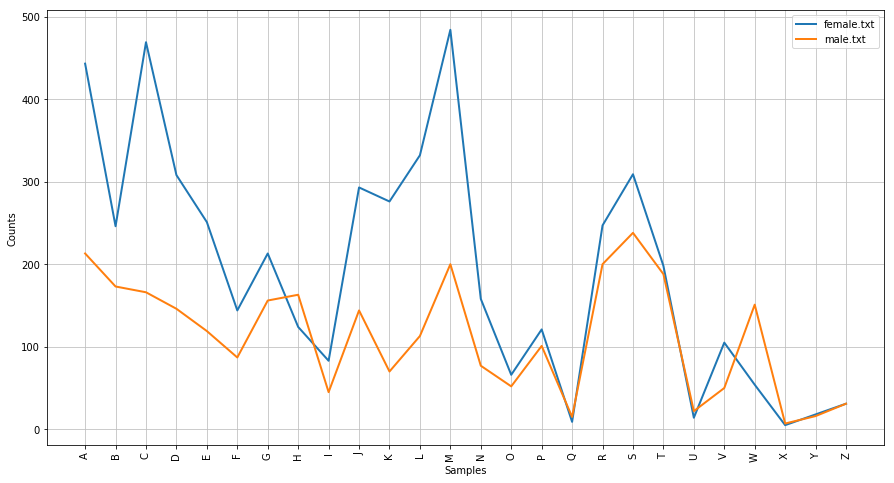

In [56]:
plt.figure(figsize=(15, 8))
cfd_ex8.plot()

# Exercise 9

Pick a pair of texts and study the differences between them, in terms of vocabulary,
vocabulary richness, genre, etc. Can you find pairs of words that have quite
different meanings across the two texts, such as monstrous in Moby Dick and in
Sense and Sensibility?

In [57]:
def lexical_diversity(tokens):
    return tokens_count(tokens) / types_count(tokens)

In [58]:
humor = get_word_tokens(brown.words(categories='humor'))

In [59]:
government = get_word_tokens(brown.words(categories='government'))

In [60]:
tokens_count(humor), types_count(humor), lexical_diversity(humor)

(17776, 4452, 3.9928122192273134)

In [61]:
tokens_count(government), types_count(government), lexical_diversity(government)

(59959, 6444, 9.304624456859093)

'humor' genre is more diverse than 'government' maybe because 'goverment' uses more official comminication style

In [62]:
Text(humor).concordance('state')

Displaying 5 of 5 matches:
er reporters and cameramen barco his state of apprehension gone never to return
n becomes an angry old man about the state of literature or something else that
aranoiac and the to become head of a state complete power not only corrupts but
to you sure as to the constables and state troopers who followed in your wake t
p of tea they hail from travancore a state in the subcontinent where kali the g


In [63]:
Text(government).concordance('state')

Displaying 25 of 196 matches:
ction of saying that he was from the state of texas i did so because i agree wi
 the interests of my district and my state what sam life proves to us all is th
ts of own community own district own state and by that help himself represent e
rs to our community our district our state and if we follow the rayburn pattern
ties in helping to pilot the ship of state through the shoals of stormy interna
table american sam rayburn origin of state automobile practices the practice of
s back over forty years at least one state vehicle was in existence in the stat
tate vehicle was in existence in the state presently owns passenger vehicles in
 for an average per mile purchase of state vehicles is handled similarly to all
vehicles is handled similarly to all state purchases unit prices to the state a
l state purchases unit prices to the state are considerably lower than to the g
quantity purchases and no payment of state sales or federal excise taxes vehicl
ase assign

# Exercise 10

Read the BBC News article: “UK’s Vicky Pollards ‘left behind’” at http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic
about teen language: “the top 20 words used, including yeah, no, but and like,
account for around a third of all words.” How many **word types** account for a third
of all **word tokens**, for a variety of text sources? What do you conclude about this
statistic? Read more about this on LanguageLog, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

In [64]:
import pandas as pd

from nltk.corpus import nps_chat
from nltk.probability import FreqDist

In [65]:
def get_top_word_types_by_cum_ratio(tokens, cum_ratio):
    
    fd = FreqDist(tokens)
    items_df = (
        pd.DataFrame(data=fd.items(), columns=['sample', 'freq'])
        .sort_values(by='freq', ascending=False)
        .reset_index(drop=True)
    )
    items_df['cum_freq'] = items_df['freq'].cumsum()
    items_df['ratio'] = items_df['freq'] / fd.N()
    items_df['cum_ratio'] = items_df['ratio'].cumsum()
    ind = (items_df['cum_ratio'] > cum_ratio).idxmax()
    
    return items_df.head(ind)

In [66]:
chat_teens = get_word_tokens(nps_chat.words('11-09-teens_706posts.xml'))
chat_adults = get_word_tokens(nps_chat.words('11-09-adults_706posts.xml'))

In [67]:
news = get_word_tokens(brown.words(categories='news'))
romance = get_word_tokens(brown.words(categories='romance'))

In [68]:
alice = get_word_tokens(gutenberg.words('carroll-alice.txt'))
sense = get_word_tokens(gutenberg.words('austen-sense.txt'))

In [69]:
for corpus_name, words in zip(
    ('chat_teens', 'chat_adults', 'news', 'romance', 'alice', 'sense'), 
    (chat_teens, chat_adults, news, romance, alice, sense)
):
    print(corpus_name.upper())
    print(get_top_word_types_by_cum_ratio(words, 1 / 3))

CHAT_TEENS
   sample  freq  cum_freq     ratio  cum_ratio
0    join   139       139  0.066412   0.066412
1    part   128       267  0.061156   0.127568
2       i    61       328  0.029145   0.156713
3      to    53       381  0.025323   0.182035
4      me    51       432  0.024367   0.206402
5    chat    36       468  0.017200   0.223602
6      pm    36       504  0.017200   0.240803
7     the    36       540  0.017200   0.258003
8     you    35       575  0.016722   0.274725
9     hey    31       606  0.014811   0.289537
10      m    28       634  0.013378   0.302914
11      a    27       661  0.012900   0.315815
12    any    27       688  0.012900   0.328715
CHAT_ADULTS
   sample  freq  cum_freq     ratio  cum_ratio
0    part   103       103  0.044397   0.044397
1       i    98       201  0.042241   0.086638
2    join    90       291  0.038793   0.125431
3     lol    69       360  0.029741   0.155172
4      to    57       417  0.024569   0.179741
5     you    50       467  0.021552  

Almost always top-20 words are stopwords and it is normal

# Exercise 11

Investigate the table of modal distributions and look for other patterns. Try to
explain them in terms of your own impressionistic understanding of the different
genres. Can you find other closed classes of words that exhibit significant differences
across different genres?

In [70]:
cfd = nltk.ConditionalFreqDist(
    (genre, word.lower())
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    94    87    93    38    53   389 
       religion    84    59    79    12    54    72 
        hobbies   276    59   143    22    84   269 
science_fiction    16    49     4    12     8    17 
        romance    79   195    11    51    46    49 
          humor    17    33     8     8     9    13 


'will' dominates in news genre. One of the main uses of 'will' is to refer to things in the future that we think are certain (see https://dictionary.cambridge.org/grammar/british-grammar/modals-and-modality/will)

'can' dominates in hobbies and religion genres. We often use 'can' to talk about ability to do something in the present or future (see https://dictionary.cambridge.org/grammar/british-grammar/modals-and-modality/can)

In such artistic genres such as science_fiction, romance and humor 'could' dominates over all other modal verbs. We often use 'could' to express possibility in the present and the future (see https://dictionary.cambridge.org/grammar/british-grammar/modals-and-modality/could)

In [71]:
cfd = nltk.ConditionalFreqDist(
    (genre, word.lower())
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
coord_conjs = ['and', 'for', 'or', 'but', 'so', 'nor', 'yet']
cfd.tabulate(conditions=genres, samples=coord_conjs)

                 and  for   or  but   so  nor  yet 
           news 2186  969  174  283   81   15   17 
       religion  962  315  168  175   99   18   34 
        hobbies 2178  857  461  221  121   10   19 
science_fiction  294  100   31   89   26    2   11 
        romance 1905  441  165  387  192    8   30 
          humor  529  158   69  101   56    6    4 


According to the distribution above 'and' and 'for' are the most popular coordinating conjunctions over all genres.

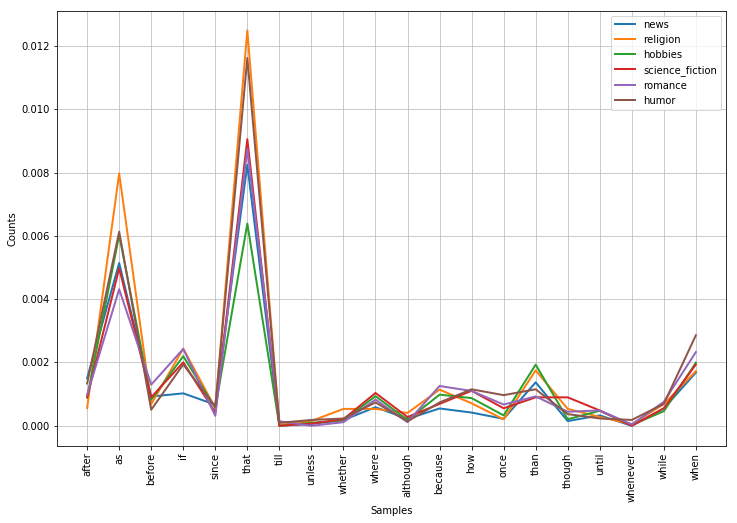

In [72]:
cfd = nltk.ConditionalFreqDist(
    (genre, word.lower())
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
subord_conjs = [
    'after', 'as', 'before', 'if', 'since', 'that', 'till', 'unless', 'whether', 'where', 
    'although', 'because', 'how', 'once', 'than', 'though', 'until', 'whenever', 'while', 'when'
]

for genre in cfd.conditions():
    N = cfd[genre].N()
    for sample in cfd[genre].keys():
        cfd[genre][sample] /= N

plt.figure(figsize=(12, 8))
cfd.plot(conditions=genres, samples=subord_conjs)

You can see 'as' and 'that' mostly in 'religion'. While 'than' is the most frequent in 'hobbies'. 'when' - in 'humor'.

# Exercise 12

The CMU Pronouncing Dictionary contains multiple pronunciations for certain
words. How many distinct words does it contain? What fraction of words in this
dictionary have more than one possible pronunciation?

In [73]:
from nltk.corpus import cmudict

In [74]:
word_tokens = get_word_tokens(cmudict.words())

In [75]:
fd_ex12 = FreqDist(word_tokens)

In [76]:
word_types_count = fd_ex12.B()
word_types_count

115533

In [77]:
fraction = (fd_ex12.B() - len(fd_ex12.hapaxes())) / fd_ex12.B()
fraction

0.07350280872131772

# Exercise 13

What percentage of noun synsets have no hyponyms? You can get all noun synsets
using wn.all_synsets('n').

In [78]:
synset_count, no_hyponyms_count = 0, 0
for synset in wn.all_synsets('n'):
    synset_count += 1
    if not len(synset.hyponyms()):
        no_hyponyms_count += 1

In [79]:
no_hyponyms_count / synset_count

0.7967119283931072

# Exercise 14

Define a function supergloss(s) that takes a synset s as its argument and returns
a string consisting of the concatenation of the definition of s, and the definitions
of all the hypernyms and hyponyms of s.

In [80]:
def supergloss(s):
    return ', '.join([
        s.definition(),
        ', '.join(hypernym.definition() for hypernym in s.hypernyms()),
        ', '.join(hyponym.definition() for hyponym in s.hyponyms())
    ])

In [81]:
s = wn.synset('child.n.01')

In [82]:
supergloss(s)

'a young person of either sex, a young person, not fully developed, a child: son or daughter, a robust child, a child secretly exchanged for another in infancy, a prodigy whose talents are recognized at an early age, a child who is raised by foster parents, one who is playfully mischievous, a young child, a child who has lost both parents, a young child who is small for his age, (ethnic slur) offensive term for a Black child, a child afflicted by some disease or deformity whose picture is used on posters to raise money for charitable purposes, a child who attends a preschool or kindergarten, a word used for misbehaving children, a child, a young child, poor and often mischievous city child, a homeless child especially one forsaken or orphaned'

# Exercise 15

Write a program to find all words that occur at least three times in the Brown Corpus.

In [83]:
fd_ex15 = FreqDist(get_word_tokens(brown.words()))
result = [w for w in fd_ex15 if fd_ex15[w] >= 3]
len(result)

18954

In [84]:
result[:5]

['the', 'fulton', 'county', 'grand', 'jury']

# Exercise 16

Write a program to generate a table of lexical diversity scores (i.e., **token/type**
ratios), as we saw in Table 1-1. Include the full set of Brown Corpus genres
(nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest
number of **tokens** per **type**)? Is this what you would have expected?

In [85]:
stats = []
for category in brown.categories():
    tokens = brown.words(categories=category)
    stats.append((
        category, 
        tokens_count(tokens), 
        types_count(tokens), 
        lexical_diversity(tokens)
    ))

In [86]:
stats_df = pd.DataFrame(
    data=stats, 
    columns=[
        'Category', 
        'Token', 
        'Types', 
        'Lexical diversity'
    ]
)

In [87]:
stats_df

,Category,Token,Types,Lexical diversity
0,adventure,69342,8874,7.814064
1,belles_lettres,173096,18421,9.396667
2,editorial,61604,9890,6.228918
3,fiction,68488,9302,7.362718
4,government,70117,8181,8.570713
5,hobbies,82345,11935,6.899455
6,humor,21695,5017,4.324297
7,learned,181888,16859,10.788778
8,lore,110299,14503,7.605254
9,mystery,57169,6982,8.188055


'humor' is more lexically diverse than others. 'learned' is less diverse than others

# Exercise 17

Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [88]:
from nltk.corpus import stopwords

STOPWORDS_ENG = set(stopwords.words('english'))

In [89]:
def get_top_n_words(tokens, n=50):
    fd = FreqDist(t for t in tokens if t not in STOPWORDS_ENG)
    return fd.most_common(n)

In [90]:
get_top_n_words(get_word_tokens(brown.words()))

[('one', 3292),
 ('would', 2714),
 ('said', 1961),
 ('new', 1635),
 ('could', 1601),
 ('time', 1598),
 ('two', 1412),
 ('may', 1402),
 ('first', 1361),
 ('like', 1292),
 ('man', 1207),
 ('even', 1170),
 ('made', 1125),
 ('also', 1069),
 ('many', 1030),
 ('must', 1013),
 ('af', 996),
 ('back', 966),
 ('years', 950),
 ('much', 937),
 ('way', 908),
 ('well', 897),
 ('people', 847),
 ('little', 831),
 ('state', 807),
 ('good', 806),
 ('make', 794),
 ('world', 787),
 ('still', 782),
 ('see', 772),
 ('men', 763),
 ('work', 762),
 ('long', 752),
 ('get', 749),
 ('life', 715),
 ('never', 697),
 ('day', 687),
 ('another', 684),
 ('know', 683),
 ('last', 676),
 ('us', 675),
 ('might', 672),
 ('great', 665),
 ('old', 661),
 ('year', 658),
 ('come', 630),
 ('since', 628),
 ('go', 626),
 ('came', 622),
 ('right', 613)]

# Exercise 18

Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [91]:
def get_top_n_bigrams(tokens, n=50):
    fd = FreqDist(nltk.bigrams(
        t for t in tokens if t not in STOPWORDS_ENG
    ))
    return fd.most_common(n)

In [92]:
get_top_n_bigrams(get_word_tokens(brown.words()))

[(('united', 'states'), 392),
 (('new', 'york'), 296),
 (('per', 'cent'), 146),
 (('years', 'ago'), 138),
 (('af', 'af'), 129),
 (('could', 'see'), 93),
 (('rhode', 'island'), 91),
 (('last', 'year'), 78),
 (('even', 'though'), 77),
 (('high', 'school'), 74),
 (('white', 'house'), 68),
 (('first', 'time'), 68),
 (('old', 'man'), 68),
 (('world', 'war'), 66),
 (('two', 'years'), 62),
 (('let', 'us'), 62),
 (('one', 'thing'), 60),
 (('fiscal', 'year'), 58),
 (('last', 'night'), 57),
 (('peace', 'corps'), 55),
 (('one', 'day'), 53),
 (('one', 'another'), 52),
 (('would', 'like'), 51),
 (('last', 'week'), 51),
 (('united', 'nations'), 49),
 (('new', 'england'), 49),
 (('young', 'man'), 47),
 (('los', 'angeles'), 47),
 (('two', 'men'), 46),
 (('one', 'two'), 43),
 (('great', 'deal'), 43),
 (('civil', 'war'), 42),
 (('president', 'kennedy'), 41),
 (('would', 'make'), 41),
 (('time', 'time'), 41),
 (('general', 'motors'), 41),
 (('small', 'business'), 41),
 (('long', 'time'), 40),
 (('new', '

# Exercise 19

Write a program to create a table of word frequencies by genre, like the one given
in Section 2.1 for modals. Choose your own words and try to find words whose
presence (or absence) is typical of a genre. Discuss your findings.

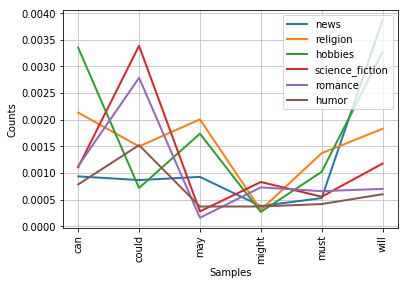

In [93]:
cfd = nltk.ConditionalFreqDist(
    (genre, word.lower())
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']

for genre in genres:
    N = cfd[genre].N()
    for modal in modals:
        cfd[genre][modal] /= N

cfd.plot(conditions=genres, samples=modals)

The same results as in exercise 11

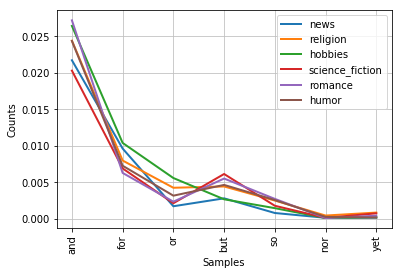

In [94]:
cfd = nltk.ConditionalFreqDist(
    (genre, word.lower())
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
coord_conjs = ['and', 'for', 'or', 'but', 'so', 'nor', 'yet']

for genre in genres:
    N = cfd[genre].N()
    for conj in coord_conjs:
        cfd[genre][conj] /= N

cfd.plot(conditions=genres, samples=coord_conjs)

The same results as in exercise 11

# Exercise 20

Write a function word_freq() that takes a **word** and the name of a section of the
Brown Corpus as arguments, and computes the frequency of the **word** in that **section
of the corpus**.

In [95]:
def word_freq(word, brown_category=None):
    word2check = word.lower()
    count_all, count_word, eps = 0, 0, 1e-9
    for w in brown.words(categories=brown_category):
        count_all += 1
        if w.lower() == word2check:
            count_word += 1
    return count_word / (count_all + eps)

In [96]:
word_freq('day')

0.0005916334249633131

In [97]:
word_freq('day', brown_category='romance')

0.0009139984576275896

In [98]:
word_freq('day', brown_category='news')

0.000755812797104036

# Exercise 21

Write a program to guess the number of syllables contained in a text, making
use of the CMU Pronouncing Dictionary.

In [99]:
PRON_DICT = cmudict.dict()

In [100]:
def syllables_count(tokens):
    return sum(
        len(PRON_DICT[w][0]) 
        for w in tokens 
        if w in PRON_DICT
    )

In [101]:
syllables_count(get_word_tokens(brown.words()))

3774998

# Exercise 22

Define a function hedge(text) that processes a text and produces a new version
with the word 'like' between every third word.

In [102]:
def hedge(text, n=3):
    result = list(text)
    for i in range(len(text) // n):
        result.insert(i + n * (i + 1), 'like')
    return result

In [103]:
text = brown.words()[:8]

In [104]:
hedge(text)

['The',
 'Fulton',
 'County',
 'like',
 'Grand',
 'Jury',
 'said',
 'like',
 'Friday',
 'an']

# Exercise 23

Zipf’s Law: Let f(w) be the frequency of a word w in free text. Suppose that all
the words of a text are ranked according to their frequency, with the most frequent
word first. Zipf’s Law states that the frequency of a word type is inversely
proportional to its rank (i.e., f × r = k, for some constant k). For example, the 50th
most common word type should occur three times as frequently as the 150th most
common word type.

**a.** Write a function to process a large text and plot word frequency against word
rank using pylab.plot. Do you confirm Zipf’s law? (Hint: it helps to use a
logarithmic scale.) What is going on at the extreme ends of the plotted line?

In [105]:
def zipf_law_plot(tokens, logy=True, logx=True, figsize=(10, 8)):
    fd = FreqDist(get_word_tokens(tokens))
    df = (
        pd.DataFrame(data=fd.items(), columns=['token', 'count'])
        .sort_values('count', ascending=False)
        .reset_index(drop=True)
    )
    df['freq'] = df['count'] / fd.N()
    df['rank'] = df.index + 1
    df.plot(
        x='freq', y='rank', 
        kind='scatter', 
        logx=logx, logy=logy, 
        figsize=figsize
    )

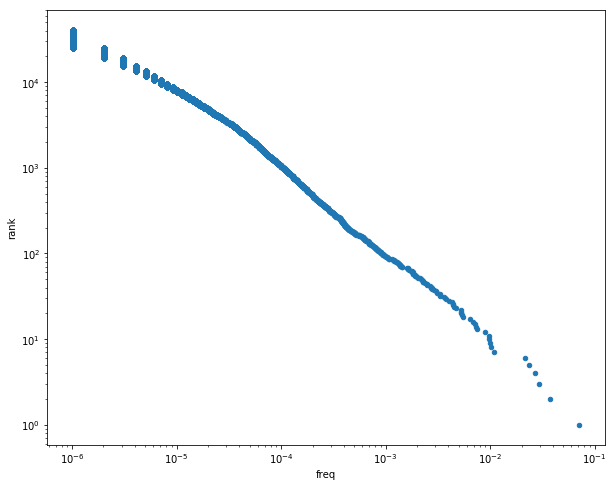

In [106]:
zipf_law_plot(brown.words())
plt.show()

Looks like it is true. Using the logarithmic scale on both axes you can see negative linear dependency between log('freq') and log('rank'). At the extreme ends of the plotted line, you can see some sparse areas. It may be caused by most frequent words as well as the rarest words. They act as outliers.

**b.** Generate random text, e.g., using random.choice("abcdefg "), taking care to
include the space character. You will need to import random first. Use the string
concatenation operator to accumulate characters into a (very) long string.
Then tokenize this string, generate the Zipf plot as before, and compare the
two plots. What do you make of Zipf’s Law in the light of this?

In [107]:
n_raw = 10_000_000

In [108]:
text_raw = ''.join(np.random.choice(list("abcdefg "), n_raw))
tokens = text_raw.split()

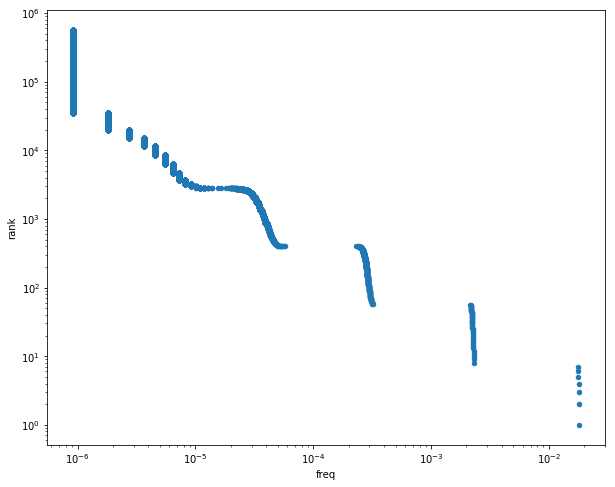

In [109]:
zipf_law_plot(tokens)
plt.show()

According to the plot, the most frequent words are 1-letter words, then 2-letter, then 3-letter and so on. Thereby, the frequency of a given random word depends on the word's length. Longer words have less chance to appear, shorter - greater chance. It is not true for the English language, where a longer word can appear more frequently than a shorter one. Distribution of a given English word depends on different factors such as syntax, phonetics, morphology, punctuation and so on.

# Exercise 24

Modify the text generation program in Example 2-1 further, to do the following
tasks:

**a.** Store the n most likely words in a list words, then randomly choose a word
from the list using random.choice(). (You will need to import random first.)

**b.** Select a particular genre, such as a section of the Brown Corpus or a Genesis
translation, one of the Gutenberg texts, or one of the Web texts. Train the
model on this corpus and get it to generate random text. You may have to
experiment with different start words. How intelligible is the text? Discuss the
strengths and weaknesses of this method of generating random text.

**c.** Now train your system using two distinct genres and experiment with generating
text in the hybrid genre. Discuss your observations.

In [110]:
def generate_model(cfdist, word, length=15, top_n=100):
    for i in range(length):
        print(word, end=' ')
        top_n_words = [w for w, count in cfdist[word].most_common(top_n)]
        word = np.random.choice(top_n_words, 1)[0]

In [111]:
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd_genesis = nltk.ConditionalFreqDist(bigrams)

In [112]:
np.random.seed(42)
generate_model(cfd_genesis, 'living')

living soul clave the sight ; take me them ; we may seek occasion against 

In [113]:
text = brown.words(categories='adventure')
bigrams = nltk.bigrams(text)
cfd_brown = nltk.ConditionalFreqDist(bigrams)

In [114]:
np.random.seed(42)
generate_model(cfd_brown, 'mountain')

mountain and most gangs and if two : he climbed upward briefly . Tilghman and 

In [115]:
text = gutenberg.words('carroll-alice.txt')
bigrams = nltk.bigrams(text)
cfd_gutenberg = nltk.ConditionalFreqDist(bigrams)

In [116]:
np.random.seed(42)
generate_model(cfd_gutenberg, 'time')

time with ?' persisted . By the whole she swallowed one arm round and as 

In [117]:
text = webtext.words('pirates.txt')
bigrams = nltk.bigrams(text)
cfd_webtext = nltk.ConditionalFreqDist(bigrams)

In [118]:
np.random.seed(42)
generate_model(cfd_webtext, 'pirate')

pirate safely behind bars , onto that loyalty is pointing ] TIA DALMA : Against 

The generated texts are not as intelligible as expected. The model generates 2-4 words sequences that have sense but no more. The model also has problems with punctuation and grammar.

In [119]:
text = brown.words(categories=['humor', 'religion'])
bigrams = nltk.bigrams(text)
cfd_hybrid = nltk.ConditionalFreqDist(bigrams)

In [120]:
np.random.seed(42)
generate_model(cfd_hybrid, 'soul')

soul was much nearer home sick comedians . From that I'm so fixed up my 

The generated text looks funny because it is a hybrid between 'humor' and 'religion' genres. However, the model still has big problems with sense, punctuation, and grammar.

# Exercise 25

Define a function find_language() that takes a string as its argument and returns
a list of languages that have that string as a word. Use the udhr corpus and limit
your searches to files in the Latin-1 encoding.

In [121]:
from nltk.corpus import udhr

In [122]:
def find_language(string):
    suffix = '-Latin1'
    return [
        file[:-len(suffix)] 
        for file in udhr.fileids()
        if file.endswith(suffix)
        and string in udhr.words(file)
    ]
    return result

In [123]:
find_language('human')

['English',
 'Interlingua',
 'NigerianPidginEnglish',
 'SolomonsPidgin_Pijin',
 'TokPisin']

In [124]:
find_language('children')

['English', 'NigerianPidginEnglish']

# Exercise 26

What is the branching factor of the noun hypernym hierarchy? I.e., for every
noun synset that **has** hyponyms—or children in the hypernym hierarchy—how
many do they have on average? You can get all noun synsets using wn.all_synsets('n').

In [125]:
np.mean([
    len(synset.hyponyms()) 
    for synset in wn.all_synsets('n') 
    if len(synset.hyponyms()) != 0
])

4.543820763194153

# Exercise 27

The polysemy of a word is the number of senses it has. Using WordNet, we can
determine that the noun dog has seven senses with len(wn.synsets('dog', 'n')).
Compute the average polysemy of nouns, verbs, adjectives, and adverbs according
to WordNet.

In [178]:
def mean_polysemy(pos=None, lang='eng'):
    return np.mean([
        len(wn.synsets(lemma_name, pos, lang)) 
        for lemma_name in wn.all_lemma_names(pos, lang)
    ])

In [179]:
mean_polysemy(wn.ADV), mean_polysemy(wn.NOUN)

(1.2532916759651864, 1.2610825311125826)

In [180]:
mean_polysemy(wn.ADJ), mean_polysemy(wn.VERB)

(1.406536617160948, 2.1865729898516784)

# Exercise 28

Use one of the predefined similarity measures to score the similarity of each of
the following pairs of words. Rank the pairs in order of decreasing similarity. How
close is your ranking to the order given here, an order that was established experimentally
by (Miller & Charles, 1998): car-automobile, gem-jewel, journey-voyage,
boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnacestove,
food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, ladbrother,
crane-implement, journey-car, monk-oracle, cemetery-woodland, foodrooster,
coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest,
lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.

In [250]:
def path_similarity(x, y):
    x_synset = wn.synset('%s.n.01' % x)
    y_synset = wn.synset('%s.n.01' % y)
    return x_synset.path_similarity(y_synset)

In [251]:
df = pd.DataFrame(
    data=[
        ('car', 'automobile'), 
        ('gem', 'jewel'), 
        ('journey', 'voyage'), 
        ('boy', 'lad'), 
        ('coast', 'shore'),
        ('asylum', 'madhouse'),
        ('magician', 'wizard'), 
        ('midday', 'noon'), 
        ('furnace', 'stove'), 
        ('food', 'fruit'), 
        ('bird', 'cock'), 
        ('bird', 'crane'), 
        ('tool', 'implement'), 
        ('brother', 'monk'), 
        ('lad', 'brother'), 
        ('crane', 'implement'), 
        ('journey', 'car'), 
        ('monk', 'oracle'), 
        ('cemetery', 'woodland'), 
        ('food', 'rooster'), 
        ('coast', 'hill'), 
        ('forest', 'graveyard'), 
        ('shore', 'woodland'), 
        ('monk', 'slave'), 
        ('coast', 'forest'), 
        ('lad', 'wizard'), 
        ('chord', 'smile'), 
        ('glass', 'magician'), 
        ('rooster', 'voyage'), 
        ('noon', 'string')
    ],
    columns=['x', 'y']
)

In [252]:
df['path_similarity'] = df.apply(lambda row: path_similarity(row['x'], row['y']), axis=1)

In [ ]:
wn.path_similarity()

In [237]:
car = wn.synset('gem.n.01')
dog = wn.synset('jewel.n.01')

In [238]:
car.path_similarity(dog)

0.125

In [218]:
wn.synsets('glass', 'n')

[Synset('glass.n.01'),
 Synset('glass.n.02'),
 Synset('glass.n.03'),
 Synset('field_glass.n.01'),
 Synset('methamphetamine.n.01'),
 Synset('looking_glass.n.01'),
 Synset('glass.n.07')]

In [232]:
glass1 = wn.synset('glass.n.01')

In [233]:
glass2 = wn.synset('glass.n.02')

In [234]:
glass1.path_similarity(glass2)

0.1